In [1]:
#Micro Credit Default Project
#Following files were given:
#Dataset csv, Feature description xlsx file

In [2]:
%matplotlib inline

In [3]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [4]:
#Reading the csv file:
df = pd.read_csv("Data_file.csv")
df.head(10)

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0           1      0  21408I70789   272.0   3055.050000   3065.150000   
1           2      1  76462I70374   712.0  12122.000000  12124.750000   
2           3      1  17943I70372   535.0   1398.000000   1398.000000   
3           4      1  55773I70781   241.0     21.228000     21.228000   
4           5      1  03813I82730   947.0    150.619333    150.619333   
5           6      1  35819I70783   568.0   2257.362667   2261.460000   
6           7      1  96759I84459   545.0   2876.641667   2883.970000   
7           8      1  09832I90846   768.0  12905.000000  17804.150000   
8           9      1  59772I84450  1191.0     90.695000     90.695000   
9          10      1  56331I70783   536.0     29.357333     29.357333   

   rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0    220.13    260.13                2.0                0.0  ...   
1   3691.26   3691.26               20.0                0.0  ...   
2    900.13    900.13                3.0                0.0  ...   
3    159.42    159.42               41.0                0.0  ...   
4   1098.90   1098.90                4.0                0.0  ...   
5    368.13    380.13                2.0                0.0  ...   
6    335.75    402.90               13.0                0.0  ...   
7    900.35   2549.11                4.0               55.0  ...   
8   2287.50   2287.50                1.0                0.0  ...   
9    612.96    612.96               11.0                0.0  ...   

   maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0              6.0                 0.0          2.0            12   
1             12.0                 0.0          1.0            12   
2              6.0                 0.0          1.0             6   
3              6.0                 0.0          2.0            12   
4              6.0                 0.0          7.0            42   
5              6.0                 0.0          3.0            18   
6              6.0                 0.0          1.0             6   
7              6.0                 0.0          7.0            42   
8              6.0                 0.0          4.0            24   
9              6.0                 0.0          1.0             6   

   maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                6                 0.0  29.000000  29.000000      UPW   
1               12                 0.0   0.000000   0.000000      UPW   
2                6                 0.0   0.000000   0.000000      UPW   
3                6                 0.0   0.000000   0.000000      UPW   
4                6                 0.0   2.333333   2.333333      UPW   
5                6                 0.0  11.000000   8.333333      UPW   
6                6                 0.0   0.000000   0.000000      UPW   
7                6                 0.0   6.000000   3.857143      UPW   
8                6                 0.0   2.666667   2.666667      UPW   
9                6                 0.0   0.000000   0.000000      UPW   

        pdate  
0  2016-07-20  
1  2016-08-10  
2  2016-08-19  
3  2016-06-06  
4  2016-06-22  
5  2016-07-02  
6  2016-07-05  
7  2016-08-05  
8  2016-06-15  
9  2016-06-08  

[10 rows x 37 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [6]:
print(df['medianamnt_loans90'].unique())
df['medianamnt_loans90'].nunique()

[0.  1.  0.5 2.  1.5 3. ]


6


**label**	Flag indicating whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}

**msisdn**	mobile number of user	

**aon**	age on cellular network in days	

**daily_decr30**	Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)	

**daily_decr90**	Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)	

**rental30**	Average main account balance over last 30 days

**rental90**	Average main account balance over last 90 days	

**last_rech_date_ma**	Number of days till last recharge of main account	

**last_rech_date_da**	Number of days till last recharge of data account	

**last_rech_amt_ma**	Amount of last recharge of main account (in Indonesian Rupiah)	

**cnt_ma_rech30**	Number of times main account got recharged in last 30 days	

**fr_ma_rech30**	Frequency of main account recharged in last 30 days

**sumamnt_ma_rech30**	Total amount of recharge in main account over last 30 days (in Indonesian Rupiah)	

**medianamnt_ma_rech30**	Median of amount of recharges done in main account over last 30 days at user level (in Indonesian Rupiah)

**medianmarechprebal30**	Median of main account balance just before recharge in last 30 days at user level (in Indonesian Rupiah)	

**cnt_ma_rech90**	Number of times main account got recharged in last 90 days

**fr_ma_rech90**	Frequency of main account recharged in last 90 days	

**sumamnt_ma_rech90**	Total amount of recharge in main account over last 90 days (in Indonasian Rupiah)

**medianamnt_ma_rech90**	Median of amount of recharges done in main account over last 90 days at user level (in Indonasian Rupiah)

**medianmarechprebal90**	Median of main account balance just before recharge in last 90 days at user level (in Indonasian Rupiah)

**cnt_da_rech30**	Number of times data account got recharged in last 30 days

**fr_da_rech30**	Frequency of data account recharged in last 30 days

**cnt_da_rech90**	Number of times data account got recharged in last 90 days

**fr_da_rech90**    Frequency of data account recharge in last 90 days

**cnt_loans30**	Number of loans taken by user in last 30 days

**amnt_loans30**	Total amount of loans taken by user in last 30 days

**maxamnt_loans30**	maximum amount of loan taken by the user in last 30 days	There are only two options: 5 & 10 Rs., for which the user needs to pay back 6 & 12 Rs. respectively

**medianamnt_loans30**	Median of amounts of loan taken by the user in last 30 days

**cnt_loans90**	Number of loans taken by user in last 90 days

**amnt_loans90**	Total amount of loans taken by user in last 90 days

**maxamnt_loans90**	maximum amount of loan taken by the user in last 90 days

**medianamnt_loans90**	Median of amounts of loan taken by the user in last 90 days

**payback30**	Average payback time in days over last 30 days

**payback90**	Average payback time in days over last 90 days	

**pcircle**	telecom circle	

**pdate**	date	


msisdn: Mobile number and pdate: Date on which loan was taken, both seems to be useless features for prediction, we will drop them in the future

Categorical Features:
1. Label : Target Class. Imbalanced class distribution
2. pcircle : Telecom circle (Only a single class, of no use in prediction) 
3. maxamnt_loans90: Amount if loans taken by the user, only 6 or 12 available


Only 3 categorical features are available. Rest of the features seem to be numerical.

In [7]:
for i in df.columns:
    print(i)
    print(df[i].max())
    print(df[i].min())

Unnamed: 0
209593
1
label
1
0
msisdn
99998I95206
00004I82738
aon
999860.755167902
-48.0
daily_decr30
265926.0
-93.0126666666667
daily_decr90
320630.0
-93.0126666666667
rental30
198926.11
-23737.14
rental90
200148.11
-24720.58
last_rech_date_ma
998650.3777327021
-29.0
last_rech_date_da
999171.809409745
-29.0
last_rech_amt_ma
55000
0
cnt_ma_rech30
203
0
fr_ma_rech30
999606.368131936
0.0
sumamnt_ma_rech30
810096.0
0.0
medianamnt_ma_rech30
55000.0
0.0
medianmarechprebal30
999479.4193189591
-200.0
cnt_ma_rech90
336
0
fr_ma_rech90
88
0
sumamnt_ma_rech90
953036
0
medianamnt_ma_rech90
55000.0
0.0
medianmarechprebal90
41456.5
-200.0
cnt_da_rech30
99914.4414195325
0.0
fr_da_rech30
999809.240107425
0.0
cnt_da_rech90
38
0
fr_da_rech90
64
0
cnt_loans30
50
0
amnt_loans30
306
0
maxamnt_loans30
99864.56086393449
0.0
medianamnt_loans30
3.0
0.0
cnt_loans90
4997.51794431359
0.0
amnt_loans90
438
0
maxamnt_loans90
12
0
medianamnt_loans90
3.0
0.0
payback30
171.5
0.0
payback90
171.5
0.0
pcircle
UPW
UPW
pdate

In [8]:
for i in df.columns:
    try:
        if df[i].min()<0:
            print(i)
    except:
        continue

aon
daily_decr30
daily_decr90
rental30
rental90
last_rech_date_ma
last_rech_date_da
medianmarechprebal30
medianmarechprebal90


**aon** age on cellular network in days	 (Cannot be negative)

**daily_decr30** : Daily amount spent from main account, averaged over last 30 days(Cannot be negative)

**daily_decr90**	Daily amount spent from main account, averaged over last 90 days (Cannot be negative)

**rental30**	Average main account balance over last 30 days (Cannot be negative)

**rental90**	Average main account balance over last 90 days	 (Cannot be negative)

**last_rech_date_ma**	Number of days till last recharge of main account	(Cannot be negative)

**last_rech_date_da**	Number of days till last recharge of data account	(Cannot be negative)

**medianmarechprebal30**	Median of main account balance just before recharge in last 30 days at user level
(in Indonesian Rupiah)	(Cannot be negative)

**medianmarechprebal90**	Median of main account balance just before recharge in last 90 days at user level
(in Indonasian Rupiah)(Cannot be negative)


These columns have negative values, which is an irregularity and the values have to be imputed (either mean or median), such that distribution won't change.


we will change the negative values to np.nan, and later impute them

In [9]:
def nan(row):
    for i in ['aon','daily_decr30','daily_decr90','rental30','rental90','last_rech_date_ma','last_rech_date_da',
              'medianmarechprebal30','medianmarechprebal90']:
        if row[i]<0:
            row[i] = np.nan
    return row
df = df.apply(nan, axis = 1)
    

In [10]:
for i in df.columns:
    try:
        if df[i].min()<0:
            print(i)
    except:
        continue

Lets find the number of outliers:

we will find the zscore for the columns, any value with zscore>3 will be treated as outlier

In [11]:
from scipy.stats import zscore
def outliers(column):
    z = abs(zscore(df[column]))
    print(df[z>3].shape[0])
    _ = (df[z>3].shape[0]/df.shape[0])* 100
    print("% of outliers = ", _)

In [12]:
for i in df.columns:
    print(i)
    try:
        outliers(i)
    except:
        continue

Unnamed: 0
0
% of outliers =  0.0
label
0
% of outliers =  0.0
msisdn
aon
0
% of outliers =  0.0
daily_decr30
0
% of outliers =  0.0
daily_decr90
0
% of outliers =  0.0
rental30
0
% of outliers =  0.0
rental90
0
% of outliers =  0.0
last_rech_date_ma
0
% of outliers =  0.0
last_rech_date_da
0
% of outliers =  0.0
last_rech_amt_ma
4257
% of outliers =  2.031079282227937
cnt_ma_rech30
3766
% of outliers =  1.7968157333498733
fr_ma_rech30
1047
% of outliers =  0.49953958386014796
sumamnt_ma_rech30
3617
% of outliers =  1.7257255728960414
medianamnt_ma_rech30
2973
% of outliers =  1.4184634028808214
medianmarechprebal30
0
% of outliers =  0.0
cnt_ma_rech90
4047
% of outliers =  1.9308850963534088
fr_ma_rech90
4707
% of outliers =  2.245781109101926
sumamnt_ma_rech90
3916
% of outliers =  1.8683830089745364
medianamnt_ma_rech90
3020
% of outliers =  1.4408878159098824
medianmarechprebal90
0
% of outliers =  0.0
cnt_da_rech30
958
% of outliers =  0.4570763336561813
fr_da_rech30
1047
% of out

<ipython-input-11-73df7ba55932>:4: RuntimeWarning: invalid value encountered in greater
  print(df[z>3].shape[0])
<ipython-input-11-73df7ba55932>:5: RuntimeWarning: invalid value encountered in greater
  _ = (df[z>3].shape[0]/df.shape[0])* 100


7610
% of outliers =  3.630846450024571
cnt_loans90
1047
% of outliers =  0.49953958386014796
amnt_loans90
4164
% of outliers =  1.9867075713406461
maxamnt_loans90
2043
% of outliers =  0.9747462940079105
medianamnt_loans90
6501
% of outliers =  3.101725725572896
payback30
3152
% of outliers =  1.503867018459586
payback90
3657
% of outliers =  1.7448101797292848
pcircle
pdate


There are lots of outliers in the dataset, and we don't exactly know whether the values are legitimate or not. So we will keep the outliers as they are for now, and test the dataset on a model, and we will test the dataset after we remove the outliers and see if there is any increase in performance

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc72776d3d0>,
      dtype=object)

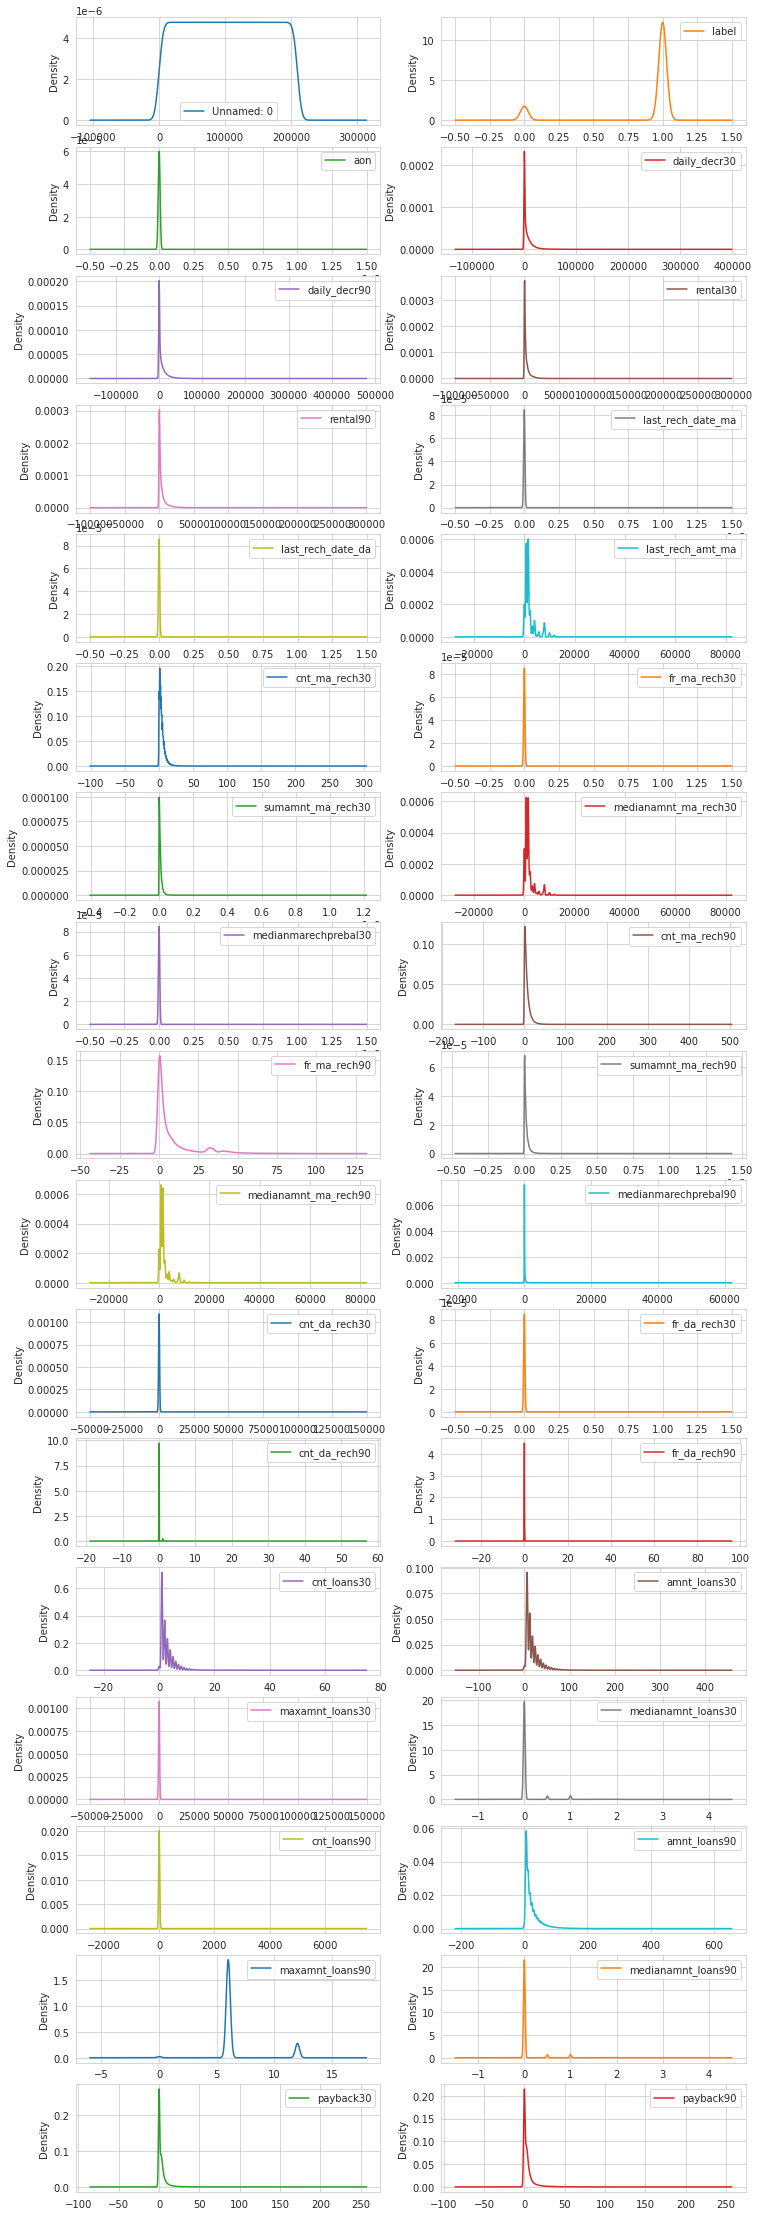

In [13]:
df.plot(kind = 'kde', subplots = True, sharex = False, figsize = (12, 40), layout = (17,2))

Most of the features are concentrated around zero, some of the distributions resemble Gaussian distribution while some don't, normalization is required for the features, and feature scaling is required

## Exploratory Data Analysis

### Label
Lets take a look at class labels:

Text(0.5, 1.0, 'Label countplot')

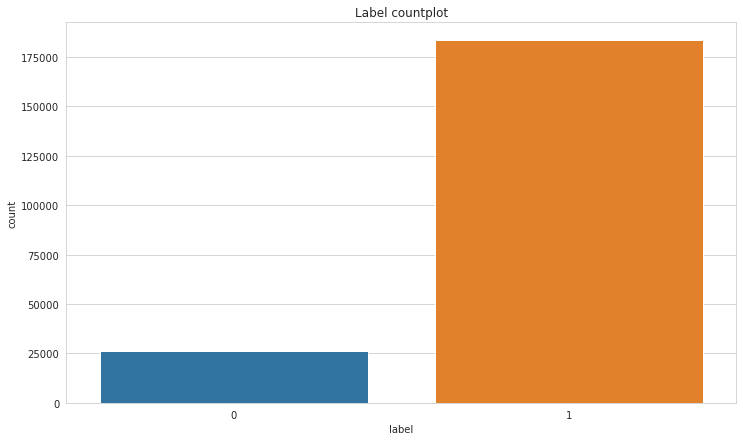

In [14]:
plt.figure().set_size_inches(12,7)
sns.countplot(df["label"])
plt.title("Label countplot")

We have a imbalance class problem, where class '1' (Loan paid) outnumbers class '0' by approx 7:1.
We have multiple methods to create balanced class, which we will explore during model building.

Lets compare label with a few features:


Text(0.5, 1.0, 'Label vs Age on Network')

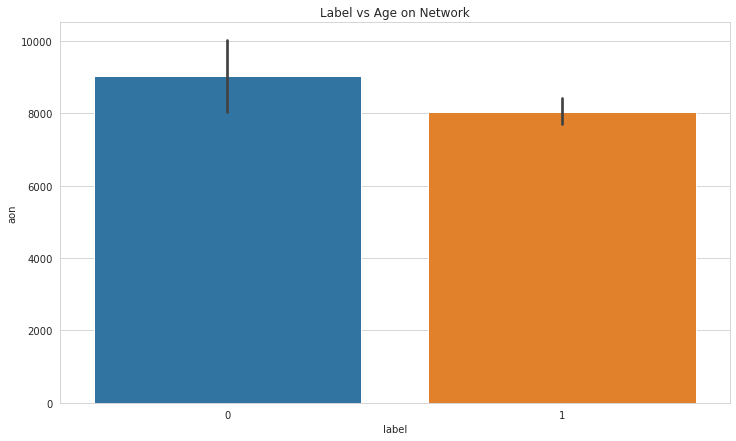

In [15]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'label', y = 'aon', data = df)
plt.title("Label vs Age on Network")

There is not much difference in people who default and those who pay on time.

Lets try - rental30 (Average main account balance over last 30 days)

Text(0.5, 1.0, 'Label vs Avg main account Balance')

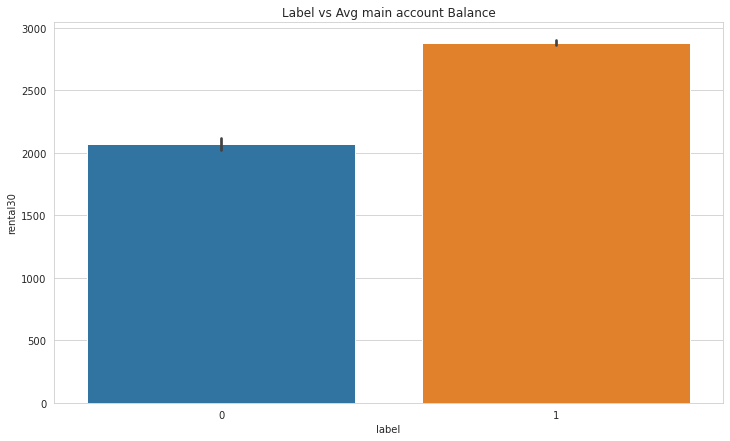

In [16]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'label', y = 'rental30', data = df)
plt.title("Label vs Avg main account Balance")

So people with lower average main account balance are more likely to default. 

Next is: daily_decr30 (Daily amount spent from main account, averaged over last 30 days)

Text(0.5, 1.0, 'Label vs Avg daily amount spent last 30 days')

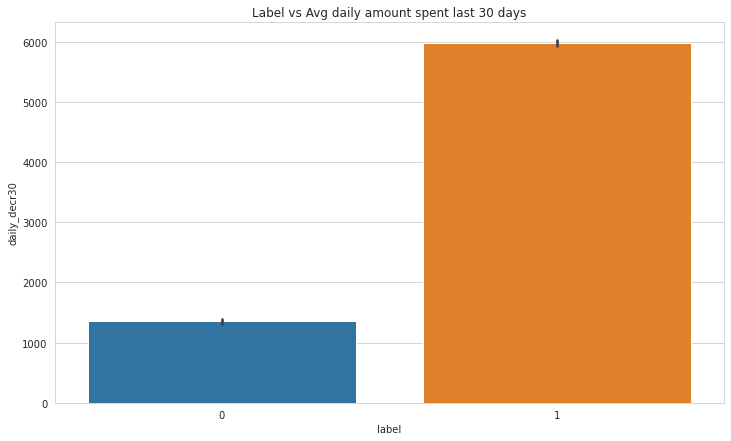

In [17]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'label', y = 'daily_decr30', data = df)
plt.title("Label vs Avg daily amount spent last 30 days")

There is a significant difference between class '0' and class '1' customers in terms of Daily amount spent. Is there a connection between loan defaults and high/low use of Account?

    To check this, we will try : cnt_ma_rech30 (Number of times main account got recharged in last 30 days) and                                    sumamnt_ma_rech30 (Total amount of recharge in main account over last 30 days)

Text(0.5, 1.0, 'Label vs Times acc Recharge in last 30 days')

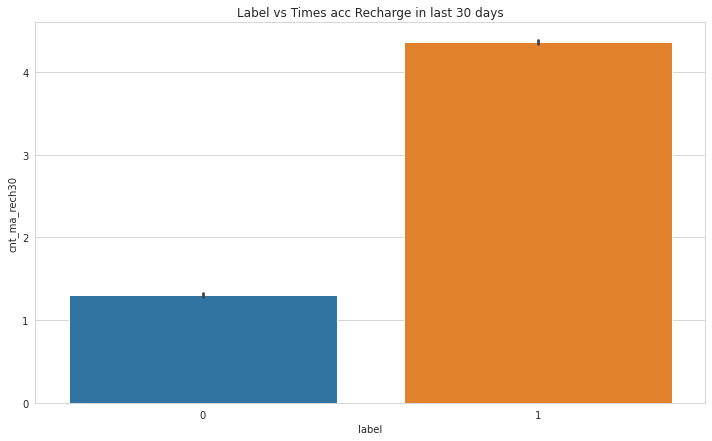

In [18]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'label', y = 'cnt_ma_rech30', data = df)
plt.title("Label vs Times acc Recharge in last 30 days")

Text(0.5, 1.0, 'Label vs Last recharge amount')

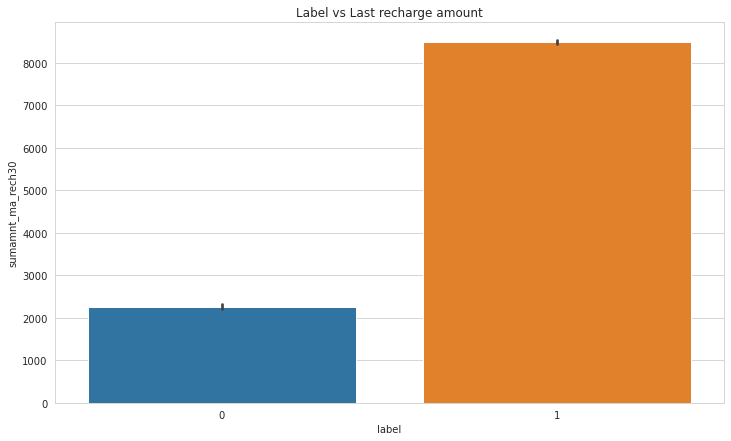

In [19]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'label', y = 'sumamnt_ma_rech30', data = df)
plt.title("Label vs Last recharge amount")

So we can say the people who use less network are more likely to default, and such clients can be identified by the amount and frequency of recharge they do, as data usage is not given.

Clients who have heavy network usage are less likely to default.

Next up: medianmarechprebal30: Median of main account balance just before recharge in last 30 days at user level. We will see how much people wait before recharging

Text(0.5, 1.0, 'Label vs Acc balance before recharge')

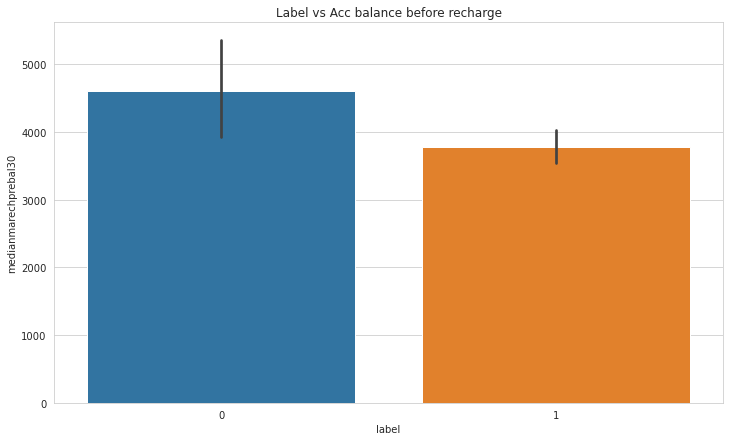

In [20]:
plt.figure().set_size_inches(12,7)
sns.barplot(x = 'label', y = 'medianmarechprebal30', data = df)
plt.title("Label vs Acc balance before recharge")

Now lets look at the correlation heatmap

### Heatmap

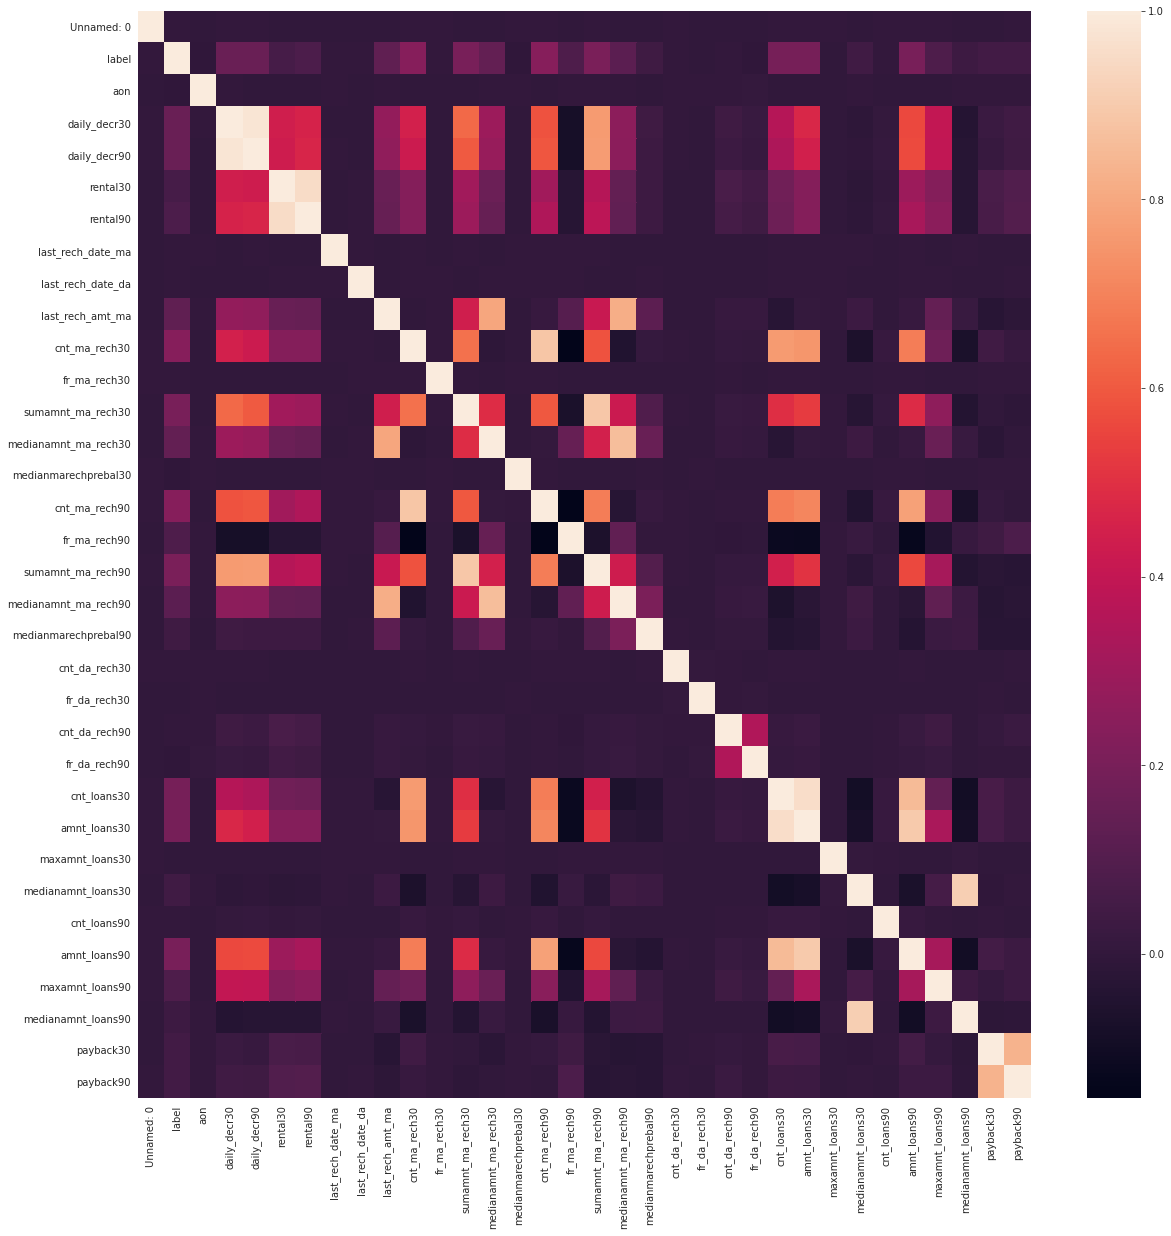

In [21]:
plt.figure().set_size_inches(20,20)
sns.heatmap(df.corr(), annot = False)

There are a few features with high correlation. 

For eg: daily_decr30 and daily_decr90: both telling daily amount spent in last 30 days and 90 days, which seems to be redundant.

rental30 and rental90: Avg main account balance over last 30 days and 90 days

cnt_loans30 and amnt_loans30:Number of loans taken by user in last 30 days and Total amount of loans taken by user in last 30 days. As number of loans increases, so does the amount

payback30 and payback90:  Average payback time in days over last 30 days and Average payback time in days over last 90 days

etc

## Data preprocessing

There are 2 tasks to be done in Data preprocessing: Categorical class encode (Using one hot encoding), numerical variable standardization

### Categorical variables

There are 3 categorical variables:

maxamnt_loans90

maxamnt_loans30

pcircle

In [22]:
df['maxamnt_loans90'].unique()

array([ 6, 12,  0])

In [23]:
df['maxamnt_loans30'].unique()

array([6.00000000e+00, 1.20000000e+01, 0.00000000e+00, ...,
       9.28645017e+04, 5.42592657e+04, 9.69272433e+04])

There seems to be many unrealistic values in this column. For ex: for taking a loan of 96927, the client has to borrow 10 and pay back 12 more than 9000 times in a month, which is improbable

amnt_loans30 :Total amount of loans taken by user in last 30 days

In [24]:
df['amnt_loans30'].unique()

array([ 12,   6,  42,  18,  24,  30,  48,  54,  36,  60,  72,   0,  66,
       114, 102, 126,  90, 156,  78, 108,  84, 150, 132,  96, 120, 180,
       228, 138, 174, 162, 168, 144, 276, 198, 306, 222, 210, 186, 270,
       258, 216, 264, 192, 252, 246, 300, 240, 204])

The total amount of loan taken in 30 days is not over 300, so there is inconsistency in the data

In [25]:
df['maxamnt_loans30'].value_counts()

6.000000        179193
12.000000        26109
0.000000          3244
59275.166722         1
68599.755670         1
                 ...  
26462.333521         1
53666.885900         1
67319.013426         1
36610.121211         1
28708.879352         1
Name: maxamnt_loans30, Length: 1050, dtype: int64

Most of the values are of 6, so we will impute the data greater than 12 with 6

In [26]:
def loan(row):
    if row['maxamnt_loans30']>12:
        row['maxamnt_loans30'] = 6.0
    return row
df=df.apply(loan, axis = 1)

In [27]:
df['maxamnt_loans30'].value_counts()

6.0     180240
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64

In [28]:
df['pcircle'].unique()

array(['UPW'], dtype=object)

There is only a single value in 'pcircle' which has no use in classification, so we will drop that feature

In [29]:
df.drop('pcircle', axis = 1, inplace = True)

Next we will encode the categorical features:


In [30]:
def encode(column):
    global df
    print(df.shape)
    cols = pd.get_dummies(df[column], drop_first = True)
    df = pd.concat([df,cols], axis = 1)
    df.drop(column, axis  = 1, inplace = True)
    print(df.shape)

In [31]:
encode("maxamnt_loans30")

(209593, 36)
(209593, 37)


In [32]:
encode('maxamnt_loans90')

(209593, 37)
(209593, 38)


### Numerical variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc73124db20>,
      dtype=object)

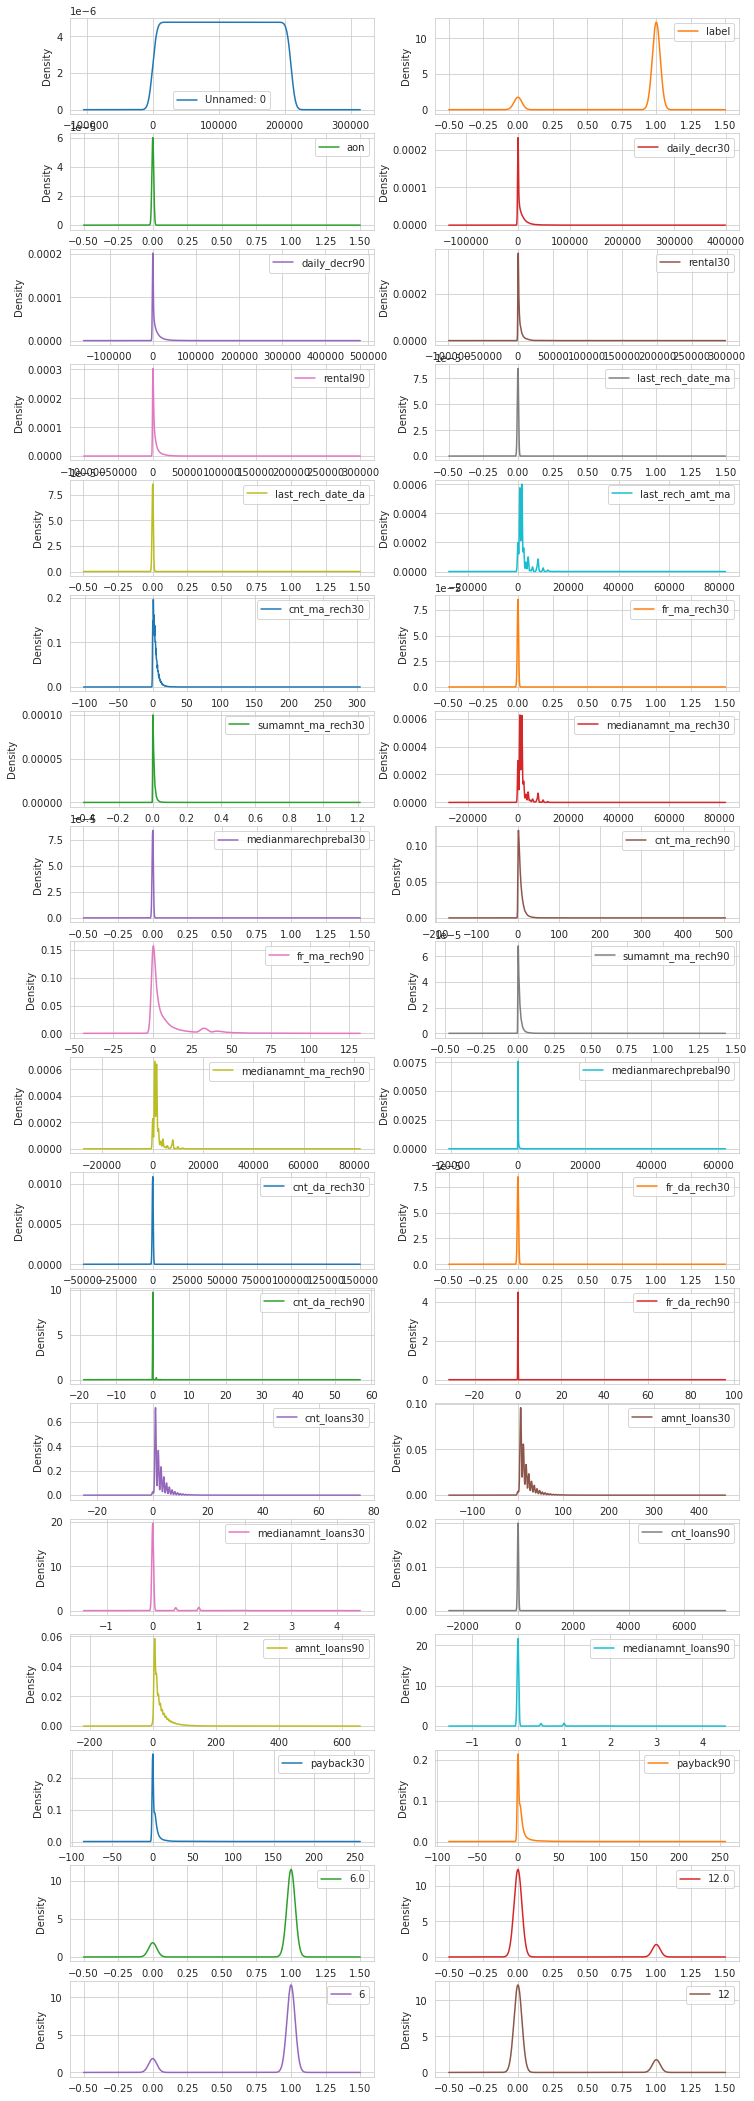

In [33]:
df.plot(kind = 'kde', subplots = True, sharex = False, figsize = (12, 40), layout = (19,2))

before we normalize the dataset, we will remove 2 more features: msisdn (mobile number) and pdate (date)

In [34]:
df.drop(['msisdn', 'pdate', 'Unnamed: 0'], axis = 1, inplace = True)

### Missing Data Imputation

In [42]:
X = df.drop('label', axis = 1)
y = df['label']

In [36]:
df.isnull().sum()

label                      0
aon                     1539
daily_decr30            1839
daily_decr90            1839
rental30                5628
rental90                5929
last_rech_date_ma       1315
last_rech_date_da         14
last_rech_amt_ma           0
cnt_ma_rech30              0
fr_ma_rech30               0
sumamnt_ma_rech30          0
medianamnt_ma_rech30       0
medianmarechprebal30    1646
cnt_ma_rech90              0
fr_ma_rech90               0
sumamnt_ma_rech90          0
medianamnt_ma_rech90       0
medianmarechprebal90    1730
cnt_da_rech30              0
fr_da_rech30               0
cnt_da_rech90              0
fr_da_rech90               0
cnt_loans30                0
amnt_loans30               0
medianamnt_loans30         0
cnt_loans90                0
amnt_loans90               0
medianamnt_loans90         0
payback30                  0
payback90                  0
6.0                        0
12.0                       0
6                          0
12            

We will be using sklearn simple imputer, with strategy = 'mean'

In [43]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = 'mean').fit(X)
X= imputer.transform(X)

In [44]:
X = np.log(X+1)

In [45]:
#Train Test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y, random_state = 0)

In [46]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

## Model Training

We will start with Tree based algorithms. Since this is an imbalanced class problem, we will be setting class_weights = 'balanced'.
We will be checking the Cross validation score, accuracy score and classification report to access the model

In [73]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score
def eval(model):
    cv_score = cross_val_score(model, X_train_sc, y_train, cv = 5)
    print("Cross validation score:\n", cv_score)
    print("Avg Cross validation score = ", np.mean(cv_score))
    test_acc = accuracy_score(y_test, y_pred)
    print("Testing accuracy = ", test_acc)
    print(classification_report(y_test, y_pred))

#### Decision Tree

In [48]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(class_weight = 'balanced').fit(X_train_sc, y_train)
y_pred = dtc.predict(X_test_sc)
eval(dtc)

Cross validation score:
 [0.86927481 0.87035623 0.87468193 0.8721374  0.86602201 0.86882117
 0.87136586 0.87079331 0.87193842 0.87123863]
Avg Cross validation score =  0.8706629782404626
Testing accuracy =  0.867669230328823
              precision    recall  f1-score   support

           0       0.47      0.48      0.48      6587
           1       0.93      0.92      0.92     45812

    accuracy                           0.87     52399
   macro avg       0.70      0.70      0.70     52399
weighted avg       0.87      0.87      0.87     52399

CPU times: user 43.7 s, sys: 108 ms, total: 43.8 s
Wall time: 44.1 s


So for class '0' aka loan default, we are getting less than 50% f1-score score, which is a low score.
For class 1, the model is performing good, which is expected 

In [69]:
from sklearn.metrics import roc_auc_score
print("ROC_AUC score = ", roc_auc_score(y_test, y_pred))

ROC_AUC score =  0.7046053533208262


We will evaluate models using both f1-scores and roc_auc_score

#### Random Forests

In [74]:
%%time
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(class_weight = 'balanced').fit(X_train_sc, y_train)
y_pred = rfc.predict(X_test_sc)
eval(rfc)

Cross validation score:
 [0.90874392 0.91291072 0.90953911 0.91332422 0.91239901]
Avg Cross validation score =  0.9113833925952324
Testing accuracy =  0.9112005954312106
              precision    recall  f1-score   support

           0       0.76      0.43      0.55      6587
           1       0.92      0.98      0.95     45812

    accuracy                           0.91     52399
   macro avg       0.84      0.71      0.75     52399
weighted avg       0.90      0.91      0.90     52399

CPU times: user 3min 19s, sys: 395 ms, total: 3min 20s
Wall time: 3min 20s


Much better. f1-score is 0.55 for Class 0, and precision has increased to 0.76. Recall has remained low at 0.43

In [44]:
print("ROC_AUC score = ", roc_auc_score(y_test, y_pred))

ROC_AUC score =  0.7056779659646475


As we can see, F1-score and roc_auc_scores are both better than Decision Tree Classifier

#### Logistic Regression

In [49]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced',max_iter = 1000).fit(X_train_sc, y_train)
y_pred = lr.predict(X_test_sc)
eval(lr)

Cross validation score:
 [0.74643766 0.74777354 0.75763359 0.75648855 0.74979324 0.75246517
 0.75201985 0.75112921 0.75201985 0.74953877]
Avg Cross validation score =  0.7515299425323918
Testing accuracy =  0.7558159506860818
              precision    recall  f1-score   support

           0       0.31      0.77      0.44      6587
           1       0.96      0.75      0.84     45812

    accuracy                           0.76     52399
   macro avg       0.63      0.76      0.64     52399
weighted avg       0.88      0.76      0.79     52399

CPU times: user 1min 25s, sys: 240 ms, total: 1min 26s
Wall time: 56.5 s


So in this model, while we are getting low accuracy, the recall is high. Lets check the roc_auc_score

In [46]:
print("ROC_AUC score = ", roc_auc_score(y_test, y_pred))

ROC_AUC score =  0.7580205304652273


This score is improvement over the earlier models, but the accuracy is very low.

In this scenario, we cannot prefer accuracy over recall or recall over the accuracy. 

While we want to identify as many loan defaulters as we can (high recall) so that the network provider can decide who to give loans and whom to block, we also need to identify who the loan defaulters are exactly (high accuracy), so the loan clients who pay the loans back in time aren't blocked. 

So we need to find a model with balanced high recall and high accuracy, 

In [67]:
%%time
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train_sc, y_train)
y_pred = gnb.predict(X_test_sc)
eval(gnb)

Cross validation score:
 [0.77938931 0.77735369 0.78543257 0.7846056  0.7812838  0.77746676
 0.78274699 0.77886634 0.78618233 0.78071124]
Avg Cross validation score =  0.7814038629609359
Testing accuracy =  0.7850531498692723
              precision    recall  f1-score   support

           0       0.33      0.70      0.45      6587
           1       0.95      0.80      0.87     45812

    accuracy                           0.79     52399
   macro avg       0.64      0.75      0.66     52399
weighted avg       0.87      0.79      0.81     52399

CPU times: user 1.18 s, sys: 268 ms, total: 1.45 s
Wall time: 1.45 s


In [48]:
print("ROC_AUC score = ", roc_auc_score(y_test, y_pred))

ROC_AUC score =  0.7580205304652273


Cross Validation score, and f1-score is low for Naive Bayes model.

In [88]:
%%time
from sklearn.ensemble import VotingClassifier
dtc_lr = VotingClassifier(estimators=[('Randon Forest', rfc), ('LogisticRegression', lr), ('Naive Bayes', gnb)],
                        voting='soft',
                        weights=[5, 1, 1]).fit(X_train_sc, y_train)
y_pred = dtc_lr.predict(X_test_sc)
eval(dtc_lr)

Cross validation score:
 [0.90639015 0.91167022 0.9074398  0.9116066  0.90959985]
Avg Cross validation score =  0.909341325104789
Testing accuracy =  0.9107998244241302
              precision    recall  f1-score   support

           0       0.70      0.51      0.59      6587
           1       0.93      0.97      0.95     45812

    accuracy                           0.91     52399
   macro avg       0.82      0.74      0.77     52399
weighted avg       0.90      0.91      0.90     52399

CPU times: user 4min 11s, sys: 247 ms, total: 4min 12s
Wall time: 3min 57s


Looking at the times, Naive Bayes is the fastest Model, but the performance is very low.                           Random Forest is the slowest model, taking very long time, but the performance is the best amongst the current models.

Compared to both above, Logistic Regression and Decision Tree model both are taking moderate time to train and are giving .
So we will be moving forward with these two models and try tuning the parameters

## Imbalance Learn

In [51]:
from imblearn.over_sampling import RandomOverSampler

In [52]:
sampler = RandomOverSampler(sampling_strategy = 'minority')
X_train_sam, y_train_sam = sampler.fit_resample(X_train_sc, y_train)

In [53]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train_sam, y_train_sam)
y_pred = dtc.predict(X_test_sc)
eval(dtc)

Cross validation score:
 [0.86463104 0.86431298 0.87022901 0.86367684 0.86016922 0.86742159
 0.86042369 0.86678542 0.86640372 0.86315923]
Avg Cross validation score =  0.8647212745729833
Testing accuracy =  0.8684326036756427
              precision    recall  f1-score   support

           0       0.48      0.48      0.48      6587
           1       0.93      0.92      0.92     45812

    accuracy                           0.87     52399
   macro avg       0.70      0.70      0.70     52399
weighted avg       0.87      0.87      0.87     52399

CPU times: user 49.1 s, sys: 87.9 ms, total: 49.2 s
Wall time: 49.1 s


In [46]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced',max_iter = 2000).fit(X_train_sam, y_train_sam)
y_pred = lr.predict(X_test_sc)
eval(lr)

Cross validation score:
 [0.70483461 0.7129771  0.71908397 0.71812977 0.71499459 0.71003244
 0.71105032 0.71493098 0.71264075 0.71073223]
Avg Cross validation score =  0.7129406767259667
Testing accuracy =  0.7146319586251646
              precision    recall  f1-score   support

           0       0.28      0.82      0.42      6587
           1       0.96      0.70      0.81     45812

    accuracy                           0.71     52399
   macro avg       0.62      0.76      0.61     52399
weighted avg       0.88      0.71      0.76     52399

CPU times: user 1min 57s, sys: 412 ms, total: 1min 57s
Wall time: 1min 18s


In [68]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_sm, y_train_sm = oversample.fit_resample(X_train_sc, y_train)

In [52]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train_sm, y_train_sm)
y_pred = dtc.predict(X_test_sc)
eval(dtc)

Cross validation score:
 [0.86412214 0.86424936 0.8697201  0.86666667 0.85876964 0.86347732
 0.8601056  0.86538584 0.86544946 0.86455881]
Avg Cross validation score =  0.8642504945717302
Testing accuracy =  0.84612301761484
              precision    recall  f1-score   support

           0       0.42      0.58      0.49      6587
           1       0.94      0.88      0.91     45812

    accuracy                           0.85     52399
   macro avg       0.68      0.73      0.70     52399
weighted avg       0.87      0.85      0.86     52399

CPU times: user 51.4 s, sys: 70.6 ms, total: 51.5 s
Wall time: 51.3 s


In [53]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(class_weight = 'balanced',max_iter = 2000).fit(X_train_sm, y_train_sm)
y_pred = lr.predict(X_test_sc)
eval(lr)

Cross validation score:
 [0.70483461 0.7129771  0.71908397 0.71812977 0.71499459 0.71003244
 0.71105032 0.71493098 0.71264075 0.71073223]
Avg Cross validation score =  0.7129406767259667
Testing accuracy =  0.7161968739861447
              precision    recall  f1-score   support

           0       0.28      0.81      0.42      6587
           1       0.96      0.70      0.81     45812

    accuracy                           0.72     52399
   macro avg       0.62      0.76      0.62     52399
weighted avg       0.88      0.72      0.76     52399

CPU times: user 1min 52s, sys: 295 ms, total: 1min 52s
Wall time: 1min 14s


In [2]:
#We will try after redcing dimension using PCA

Text(0, 0.5, 'cumulative explained variance')

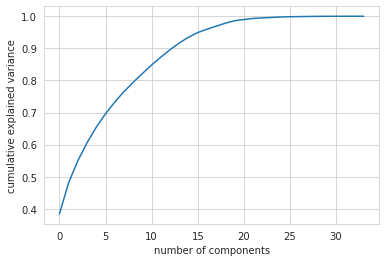

In [70]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train_sm)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [71]:
pca = PCA(n_components = 20).fit(X_train_sm)
X_train_pca = pca.transform(X_train_sm)
X_test_pca = pca.transform(X_test_sc)

In [66]:
%%time
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier().fit(X_train_pca, y_train_sm)
y_pred = dtc.predict(X_test_pca)
eval(dtc)

Cross validation score:
 [0.86304071 0.86221374 0.87029262 0.86507634 0.85806985 0.86500414
 0.85953305 0.86589478 0.86576754 0.86354094]
Avg Cross validation score =  0.8638433702944864
Testing accuracy =  0.7988511231130365
              precision    recall  f1-score   support

           0       0.32      0.54      0.40      6587
           1       0.93      0.84      0.88     45812

    accuracy                           0.80     52399
   macro avg       0.62      0.69      0.64     52399
weighted avg       0.85      0.80      0.82     52399

CPU times: user 57.4 s, sys: 15.7 ms, total: 57.4 s
Wall time: 57.5 s


In [67]:
%%time
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter = 2000).fit(X_train_pca, y_train_sm)
y_pred = lr.predict(X_test_pca)
eval(lr)

Cross validation score:
 [0.87639949 0.87703562 0.87659033 0.87639949 0.87581907 0.87569184
 0.87600992 0.87632801 0.87639163 0.87632801]
Avg Cross validation score =  0.8762993420387023
Testing accuracy =  0.7057959121357278
              precision    recall  f1-score   support

           0       0.27      0.80      0.41      6587
           1       0.96      0.69      0.80     45812

    accuracy                           0.71     52399
   macro avg       0.62      0.75      0.61     52399
weighted avg       0.87      0.71      0.75     52399

CPU times: user 1min 16s, sys: 267 ms, total: 1min 16s
Wall time: 51.6 s
